## Imports

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians
import collections


%matplotlib inline

## Loading the datasets

In [3]:
routes = pd.read_csv('routes.dat', header=None)

routes.columns = ['Airline','Airline ID',
                'Source airport',
                'Source airport ID',
                'Destination airport',
                'Destination airport ID',
                'Codeshare',
                'Stops',
                'Equipment']

In [4]:
routes.head()

,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [5]:
airports = pd.read_csv(
    'airports.dat',
    header=None,
    index_col=4,
    na_values='\\N')
airports.columns = ['Airport ID',
                    'Name',
                    'City',
                    'Country',
                    'ICAO',
                    'Latitude',
                    'Longitude',
                    'Altitude',
                    'Timezone',
                    'DST',
                    'TZ',
                    'Type',
                    'Source']

In [6]:
airports.head()

,Airport ID,Name,City,Country,ICAO,Latitude,Longitude,Altitude,Timezone,DST,TZ,Type,Source
4,,,,,,,,,,,,,
GKA,1,Goroka Airport,Goroka,Papua New Guinea,AYGA,-6.081690,145.391998,5282,10.0,U,Pacific/Port_Moresby,airport,OurAirports
MAG,2,Madang Airport,Madang,Papua New Guinea,AYMD,-5.207080,145.789001,20,10.0,U,Pacific/Port_Moresby,airport,OurAirports
HGU,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,AYMH,-5.826790,144.296005,5388,10.0,U,Pacific/Port_Moresby,airport,OurAirports
LAE,4,Nadzab Airport,Nadzab,Papua New Guinea,AYNZ,-6.569803,146.725977,239,10.0,U,Pacific/Port_Moresby,airport,OurAirports
POM,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,AYPY,-9.443380,147.220001,146,10.0,U,Pacific/Port_Moresby,airport,OurAirports


## Cleaning

In [7]:
airports_route = list(set(set(routes['Source airport']) | set(routes['Destination airport'])))

In [8]:
airports_air = list(airports.index)

In [9]:
airports_route

['PJG',
 'KIH',
 'ZCO',
 'UTT',
 'SOU',
 'MBJ',
 'TIU',
 'IAG',
 'UPN',
 'JLN',
 'YCD',
 'SOC',
 'BOH',
 'TOS',
 'SOM',
 'SFN',
 'VAO',
 'TEB',
 'HPB',
 'ALO',
 'FAI',
 'HFA',
 'YRG',
 'YPX',
 'YFB',
 'PJM',
 'TQI',
 'PDG',
 'CJS',
 'MLH',
 'OBU',
 'SEN',
 'SRG',
 'VDS',
 'TLT',
 'BHQ',
 'TRO',
 'HBX',
 'MKW',
 'TSH',
 'CRK',
 'LDH',
 'CMX',
 'TRR',
 'IRK',
 'KPO',
 'LPM',
 'HUY',
 'SQS',
 'CAE',
 'PKZ',
 'YGR',
 'ASW',
 'PPK',
 'GRP',
 'BIR',
 'GSO',
 'ROC',
 'LAR',
 'MVP',
 'SWJ',
 'CMW',
 'YDP',
 'SHR',
 'KWI',
 'YIH',
 'AER',
 'FRD',
 'CDR',
 'YHP',
 'EKS',
 'LEC',
 'SAE',
 'MCE',
 'WBB',
 'MCX',
 'PBC',
 'YWB',
 'DSN',
 'GOT',
 'DIE',
 'MQJ',
 'OAJ',
 'NAH',
 'HET',
 'LBJ',
 'ABM',
 'AMQ',
 'CHY',
 'IJK',
 'DJJ',
 'KAZ',
 'AEX',
 'SAH',
 'PRI',
 'CGQ',
 'MAH',
 'YMN',
 'XKS',
 'NAP',
 'KHS',
 'LGK',
 'BNS',
 'YSO',
 'NJC',
 'THX',
 'IUI',
 'TBG',
 'LHE',
 'KAW',
 'PUU',
 'SEZ',
 'ISU',
 'LMT',
 'ISE',
 'YZS',
 'BTT',
 'PIP',
 'MBS',
 'RIB',
 'HKK',
 'KGI',
 'CLQ',
 'ERZ',
 'TKG',


In [10]:
nodes = list(set(airports_air) & set(airports_route))

In [11]:
routes_clean = routes[(routes['Source airport'].isin(nodes)) & (routes['Destination airport'].isin(nodes))]

In [12]:
airports_clean = airports[airports.index.isin(nodes)]

**Save the clean data**

In [13]:
routes_clean.to_csv('routes_clean.csv', index=False)
airports_clean.to_csv('airports_clean.csv')

## World map

**Load clean data**

In [14]:
routes = pd.read_csv('routes_clean.csv', low_memory=False)

In [15]:
airports = pd.read_csv('airports_clean.csv', index_col=0)

**Get edges from routes and create graph**

In [16]:
edges = routes[['Source airport', 'Destination airport']].values

In [17]:
G = nx.from_edgelist(edges)

/home/arnaud/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


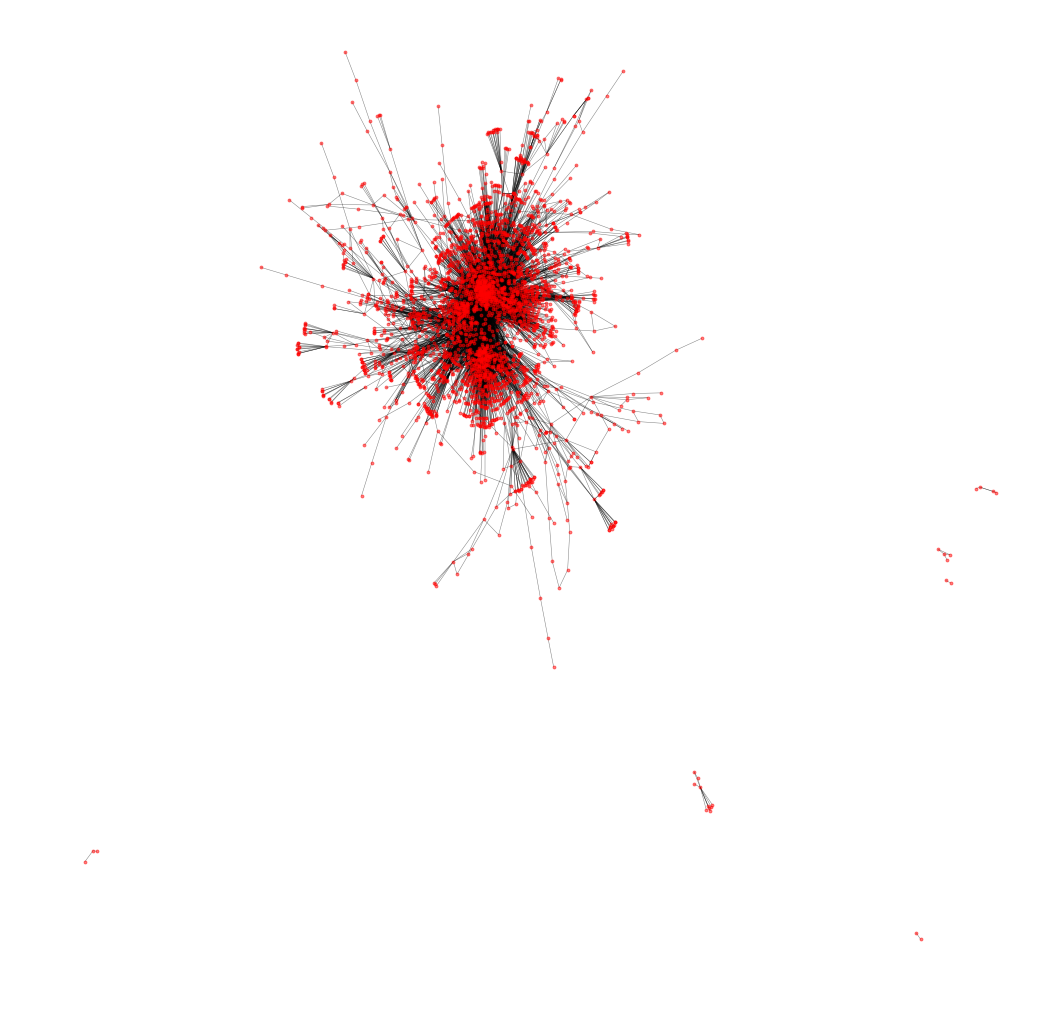

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(18, 18))
nx.draw_networkx(G, ax=ax, node_size=8, alpha=.5,
                 width=.5, with_labels=False)
ax.set_axis_off()

Get largest connected component for the rest

In [19]:
largest_cc = max(nx.connected_component_subgraphs(G), key=len)

To create the map, we first retrieve the coordinates from the airports dataframe

In [20]:
pos = {airport: (v['Longitude'], v['Latitude'])
       for airport, v in
       airports.to_dict('index').items()}

Node size will be the degree of the nodes

In [21]:
deg = nx.degree(largest_cc)
sizes = [5 * deg[iata] for iata in largest_cc.nodes]

Color of the nodes is the altitude

In [22]:
altitude = airports['Altitude']
altitude = [altitude[iata] for iata in largest_cc.nodes]

Display label only if degree is quite big

In [23]:
labels = {iata: iata if deg[iata] >= 200 else ''
          for iata in largest_cc.nodes}

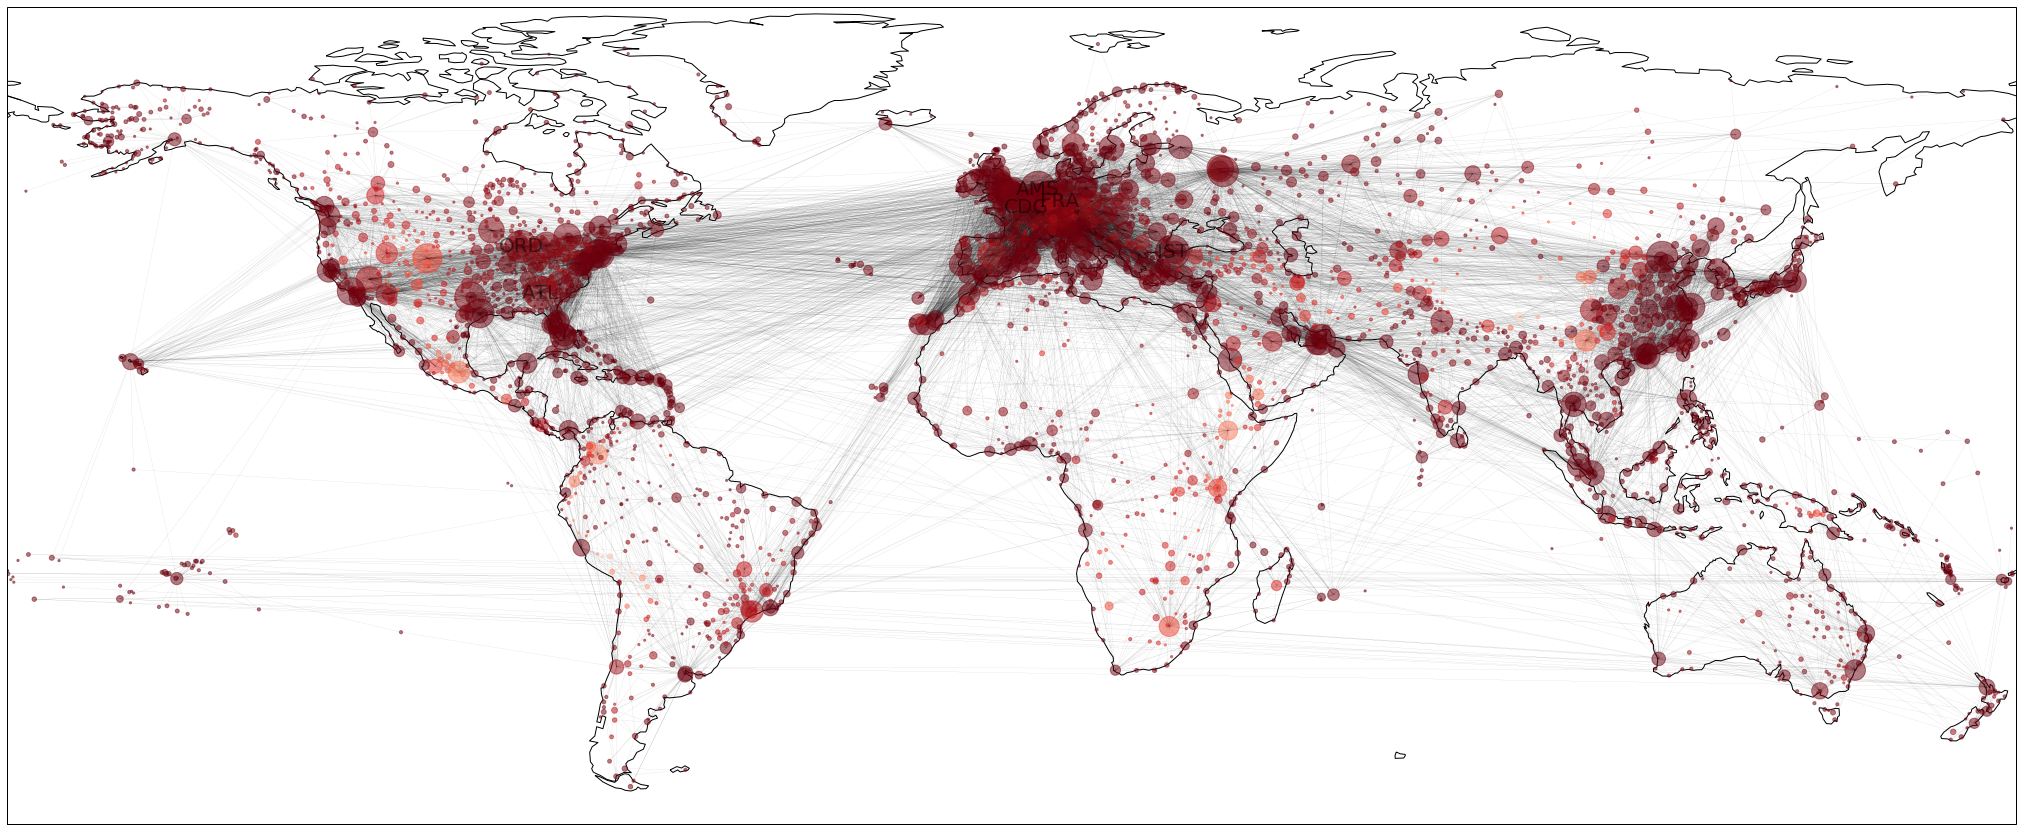

In [24]:
# Map projection
fig, ax = plt.subplots(
    1, 1, figsize=(36, 24),
    subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.coastlines()

# Extent of continental US.
#ax.set_extent([-128, -62, 20, 50])
nx.draw_networkx(largest_cc, ax=ax,
                 font_size=20,
                 alpha=.5,
                 width=.075,
                 node_size=sizes,
                 labels=labels,
                 pos=pos,
                 node_color=altitude,
                 cmap=plt.cm.Reds_r)

## Flight distance

In [25]:
#Calculate distance between 2 points on a sphere
def distanceFromCoord(lat1, lon1, lat2, lon2):
    
    # approximate radius of earth in km
    R = 6373.0
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [26]:
routes_clean['Source latitude'] = routes_clean.apply(lambda row : airports_clean[airports_clean['Airport ID'] == int(row['Source airport ID'])].Latitude.values.item(0), axis = 1)
routes_clean['Source longitude'] = routes_clean.apply(lambda row : airports_clean[airports_clean['Airport ID'] == int(row['Source airport ID'])].Longitude.values.item(0), axis = 1)
routes_clean['Destination latitude'] = routes_clean.apply(lambda row : airports_clean[airports_clean['Airport ID'] == int(row['Destination airport ID'])].Latitude.values.item(0), axis = 1)
routes_clean['Destination longitude'] = routes_clean.apply(lambda row : airports_clean[airports_clean['Airport ID'] == int(row['Destination airport ID'])].Longitude.values.item(0), axis = 1)



In [46]:
routes_clean['Distance'] = routes_clean.apply(lambda row : geodesic((row['Source latitude'], row['Source longitude']), (row['Destination latitude'], row['Destination longitude'])).kilometers, axis = 1)

(array([6.1390e+03, 1.0728e+04, 9.9830e+03, 8.2740e+03, 6.6020e+03,
        5.2610e+03, 3.3910e+03, 2.6460e+03, 2.1850e+03, 1.7690e+03,
        1.3180e+03, 8.6300e+02, 6.8400e+02, 4.3600e+02, 3.3400e+02,
        2.9700e+02, 3.3300e+02, 3.3700e+02, 4.3300e+02, 4.5800e+02,
        3.9400e+02, 3.5600e+02, 2.6900e+02, 3.0700e+02, 3.4900e+02,
        3.0900e+02, 2.0800e+02, 2.5500e+02, 2.4100e+02, 2.1200e+02,
        8.3000e+01, 1.0000e+02, 1.1400e+02, 6.8000e+01, 1.0000e+02,
        6.5000e+01, 4.8000e+01, 4.4000e+01, 1.0000e+01, 2.6000e+01,
        2.2000e+01, 8.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00]),
 array([    0.        ,   321.79771158,   643.59542316,   965.39313474,
         1287.19084632,  1608.9885579 ,  1930.78626948,  2252.58398106,
         2574.38169264,  2896.17940422,  3217.9771158 ,  3539.77482738,
         3861.57253896,  4183.37025054,  4505.16796212,  4826.9656737 ,
         5148.76338528,  5470.

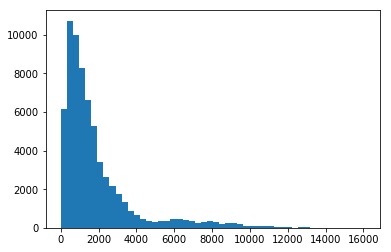

In [47]:
plt.hist(routes_clean['Distance'].values, bins = 50)

## Local/international flights

In [28]:
routes_clean['Source country'] = routes_clean.apply(lambda row : airports_clean[airports_clean['Airport ID'] == int(row['Source airport ID'])].Country.values.item(0), axis = 1)
routes_clean['Destination country'] = routes_clean.apply(lambda row : airports_clean[airports_clean['Airport ID'] == int(row['Destination airport ID'])].Country.values.item(0), axis = 1)

In [29]:
routes_clean['International flight'] = routes_clean.apply(lambda row : not (row['Source country'] == row['Destination country']), axis = 1)

In [30]:
routes_clean['International flight'].value_counts()

True     34222
False    31845
Name: International flight, dtype: int64

In [31]:
collections.Counter(routes_clean['Source country']).most_common(10)

[('United States', 12999),
 ('China', 7995),
 ('United Kingdom', 2634),
 ('Spain', 2525),
 ('Germany', 2328),
 ('France', 1924),
 ('Canada', 1835),
 ('Russia', 1793),
 ('Italy', 1770),
 ('Brazil', 1385)]

In [32]:
collections.Counter(routes_clean['Destination country']).most_common(10)

[('United States', 12994),
 ('China', 7995),
 ('United Kingdom', 2608),
 ('Spain', 2527),
 ('Germany', 2312),
 ('France', 1920),
 ('Canada', 1844),
 ('Russia', 1800),
 ('Italy', 1773),
 ('Brazil', 1382)]

In [33]:
collections.Counter(routes_clean['Source airport']).most_common(10)

[('ATL', 915),
 ('ORD', 556),
 ('CDG', 523),
 ('LHR', 523),
 ('PEK', 520),
 ('LAX', 489),
 ('FRA', 489),
 ('DFW', 469),
 ('JFK', 454),
 ('AMS', 450)]

In [34]:
collections.Counter(routes_clean['Destination airport']).most_common(10)

[('ATL', 911),
 ('ORD', 548),
 ('LHR', 520),
 ('PEK', 519),
 ('CDG', 516),
 ('LAX', 497),
 ('FRA', 485),
 ('DFW', 467),
 ('JFK', 453),
 ('AMS', 446)]

In [35]:
routes_clean[['Source airport', 'Source airport ID', 'Source country']].groupby(['Source airport', 'Source country']).count().sort_values(by = ['Source airport ID'], ascending = False)

,,Source airport ID
Source airport,Source country,
ATL,United States,915
ORD,United States,556
LHR,United Kingdom,523
CDG,France,523
PEK,China,520
LAX,United States,489
FRA,Germany,489
DFW,United States,469
JFK,United States,454


## Laplacian / distance

In [49]:
set(routes_clean.Codeshare)

{'Y', nan}